# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [9]:
neurons = [i for i in range(50,350,50)]
score_n = []
accuracy_n = []
for n in neurons:
    model = Sequential()
    model.add(Dense(n, input_shape=(784,), activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))

    model.summary()
    batch_size = 128
    n_epoch = 10

    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size, epochs=n_epoch,
                        verbose=1, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    score_n.append(score[0])
    accuracy_n.append(score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4082 - acc: 0.8890 - val_loss: 0.2502 - val_acc: 0.9292
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.2162 - acc: 0.9386 - val_loss: 0.1903 - val_acc: 0.9451
Epoch 3/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1699 - acc: 0.9521 - val_loss: 0.1543 - val_acc: 0.9552
Epoch 4/10
60000/60000 [==============================] - 1s 13us/step - 

60000/60000 [==============================] - 1s 13us/step - loss: 0.0227 - acc: 0.9937 - val_loss: 0.0765 - val_acc: 0.9788
Test score: 0.07648002929106879
Test accuracy: 0.9788
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2904 - acc: 0.9191 - val_loss: 0.1564 - val_acc: 0.9543
Epoch 2/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1271 - acc: 0.9629 - val_loss: 0.1047 - val_acc: 0.9685
Epoch 3/10
60000/60000 [====

Define some constants and train the MLP

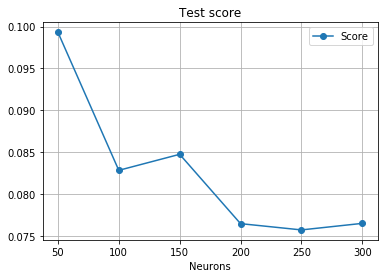

In [10]:
df = pd.DataFrame({
    'Neurons':neurons,
    'Score':score_n,
    'Accuracy':accuracy_n,
})

#ax = pl.gca()

df.plot(kind='line',x='Neurons',y='Score',style='-o')
pl.title('Test score')
#df.plot(kind='line',x='Neurons',y='Accuracy', color='red', ax=ax)
pl.grid()
pl.show()

Show the performance of the model

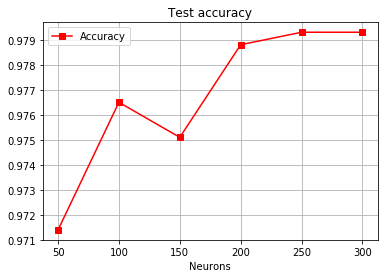

In [11]:
df.plot(kind='line',x='Neurons',y='Accuracy', color='red',style='-s')
pl.title('Test accuracy')
pl.grid()
pl.show()

Confusion matrix

In [12]:
pred = model.predict_classes(X_test)
me.confusion_matrix(y_test, pred)

array([[ 970,    0,    1,    2,    1,    0,    2,    1,    2,    1],
       [   0, 1128,    2,    0,    0,    1,    2,    0,    2,    0],
       [   5,    2, 1007,    2,    2,    0,    2,    5,    7,    0],
       [   0,    0,    3,  997,    0,    0,    0,    2,    2,    6],
       [   2,    0,    3,    1,  949,    0,    6,    2,    2,   17],
       [   2,    0,    0,   15,    0,  862,    7,    0,    5,    1],
       [   4,    2,    2,    1,    2,    3,  942,    0,    2,    0],
       [   2,    7,    8,    6,    1,    0,    0,  995,    2,    7],
       [   1,    0,    4,    5,    2,    1,    1,    3,  953,    4],
       [   2,    2,    0,    8,    3,    2,    0,    1,    1,  990]])